This project is a Python adaptation of
[Michel de Lara Scilab code](http://cermics.enpc.fr/scilab_new/site/Tp/Economics/newsvendor/index.html) and it has academic purposes.

Authors: Andres Rubiano, Jhoan Tenjo, Juan Galvis.

#1. The newsvendor problem (integer formulation)

Each morning, the newsvendor must decide how many copies $u \in \{1, 2,…,u^{\#}\}$ of the day’s paper to order. The variable $u$ is called control.
During the day, the newsvendor will meet an unknown demand $w  \in \{1,2,...,w^{\#} \}$ . The variable $w$ is called uncertainty.
The newsvendor faces an economic tradeoﬀ:

- he pays the unitary purchasing cost $c$ per copy, when he orders stock;
- he sells a copy at price $p$;
- if he remains with an unsold copy, it is worthless (perishable good).

Therefore, the newsvendor’s costs are (where $w \in \{1, 2,…,w^{\#}\}$ is a possible value of the demand)


$$j(u,w ) =c \underbrace{ u }_{cuantity \\ purchase} − p \underbrace{\min-\{u,w\}}_{quantity \\ sold}$$

       
The newsvendor’s payoﬀ is −j(u,w).

Now, we introduce a random variable $W$, where $W : \Omega \xrightarrow{} \{1, 2,…,w^{\#}\}$. Here, $\Omega$ is an underlying probability space, equipped with a probability $\mathbb{P}$. We suppose that the newsvendor knows the probability distribution $\mathbb{P}W$ of the demand W.

Thus equipped, we consider the stochastic optimization problem of expected costs minimization:

  $$ \min_{ u \in \{ 1,2,...,u^{\#}\}}    J(u) = \mathbb{E}_{\mathbb{P}}  [j(u, W )].$$
      


In [2]:
import numpy as np

# Demand
wsharp = 100;  # No larger, else the Poisson distribution cannot be computed
wflat = 1;
demand = np.zeros((1,wsharp));
for i in range(wsharp):
    demand[0][i] = i+1;

# Control

control = np.zeros((1,wsharp+1));
for i in range(wsharp+1):
    control[0][i] = i+1;

# Criterion / costs 

cc = 1;
pp = 10*cc;

# cc=1; 
# pp=1.1*cc; 

# avoid that cc/pp is the inverse of an integer when the distribution of demand is uniform

ones_demand = np.zeros((1,wsharp));
for i in range(wsharp):
    ones_demand[0][i] = 1;
    
ones_control = np.zeros((1,wsharp+1));
for i in range(wsharp+1):
    ones_control[0][i] = 1;
    
costs = np.matmul(cc*np.transpose(control),ones_demand) - pp*np.minimum(np.matmul(np.transpose(ones_control),demand),np.matmul(np.transpose(control),ones_demand));

# One row by control, one column by demand

We will consider different demand distributions

#1.1 The demand distribution is uniform

First, we suppose that the demand distribution $ℙ_{W}$ is uniform as follows.

In [3]:
probab = ones_demand;
probab = probab/np.sum(probab);

# Questions 1

- [1] Draw a histogram of the random demand W. 


- [1+1] In the Python code above, what does the matrix costs represent? (What do you ﬁnd at the intersection of a row and of a column?) Explain in detail why we have that criterion = probab*np.transpose(costs) is a row vector made of the values of $J (u) = 𝔼_{ℙ}[j(u,W )]$ for $u ∈\{1, 2,…,u^{♯}\}$? 


- [1+1] Draw the mapping $u ∈ \{1, 2,…,u^{♯}\}↦J(u)$. Thanks to the numpy min (that provides the minimum and the argmin index of a vector), give the numerical value of the decision $u^{⋆}$ (optimal order) that minimizes $u↦J(u)$. 


- [1+1] What does the vector decumprobab=1-cumsum(probab) represent? Explain your answer. Check that, in agreement with the theory, we numerically have that
    $$ℙ(W > u^{⋆} − 1) ≥ \frac{c}{p} ≥ ℙ (W > u^{⋆})$$


- [2+1] For a given value of u, explain why the random variable $j (u, W )$ can at most take the values $\{j(u,1),...,j(u,u − 1),j(u,u )\}$ . Give, for each of the u elements of this list, the corresponding probability that $j(u,W )$ takes this value in the list. In the end, you will provide an expression of the probability distribution of $j(u,W )$ , using probab and decumprobab. 


- [1+2] Draw histograms of the probability distribution of the random payoﬀ (the opposite of the costs) $− j(u, W )$ for $u = u^{⋆}$ (the optimal decision) and for $u = 𝔼_{ℙ}[W]$ (the naive deterministic solution consisting in ordering the mean demand $𝔼_{ℙ}[W])$. Draw the two histograms on the same picture, so that they have the same scale. Comment on the diﬀerences between the two histograms. 


- [1+1+1+2] The vector grand(365,"markov",ones(probab’)*probab,1) represents a sequence of realizations of 365 i.i.d. random variables having the same distribution than the demand $W$. Simulate and draw the trajectory of the cumulated payoﬀs of the newsvendor during one year if, every day, he orders the optimal quantity u = u⋆. Do the same for $u = 𝔼_{ℙ}[W]$ and draw it on the same picture. In what sense does the the optimal decision u = u⋆ does better than $u = 𝔼_{ℙ}[W]$? Justify in detail why the two trajectories are approximately straight lines; to what correspond the slopes?


Now, we study if the results are robusts to changes in the the ratio between the unitary purchasing cost $c$ and the selling price $p$.


- [2] Take $c < p$ with $c ≈ p$. Find the optimal decision $u^{⋆}$. Draw histograms of the probability distribution of the random payoﬀ $− j(u,W )$ for $u = u^{⋆}$ and for $u = 𝔼_{ℙ}[W]$. Simulate and draw trajectories of the corresponding cumulated payoﬀs.


- [2] Same question with $c << p$. 


- [2] Discuss. In particular, how does the optimal solution $u^{⋆}$ vary with the ratio $c∕p$?



#Solutions:

# Exercise [1]

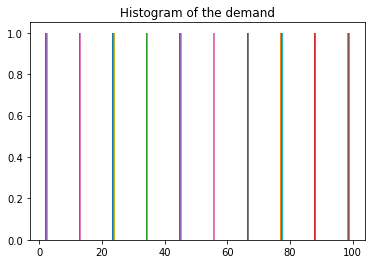

In [4]:
import matplotlib.pyplot as plt

# [1]

plt.hist(demand);
plt.title("Histogram of the demand")
plt.show();

# Exercise [1+1]

In [5]:
from IPython.display import display
import pandas as pd

# [1+1]

# the dataframe in python represents a panel data table with integrated indexing, in this case is useful represent the cost matrix.
costs_df = pd.DataFrame(costs);
display(costs_df);

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
1,-8.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,...,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0,-18.0
2,-7.0,-17.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,...,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0,-27.0
3,-6.0,-16.0,-26.0,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0,...,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0,-36.0
4,-5.0,-15.0,-25.0,-35.0,-45.0,-45.0,-45.0,-45.0,-45.0,-45.0,...,-45.0,-45.0,-45.0,-45.0,-45.0,-45.0,-45.0,-45.0,-45.0,-45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,87.0,77.0,67.0,57.0,47.0,37.0,27.0,17.0,7.0,-3.0,...,-813.0,-823.0,-833.0,-843.0,-853.0,-863.0,-873.0,-873.0,-873.0,-873.0
97,88.0,78.0,68.0,58.0,48.0,38.0,28.0,18.0,8.0,-2.0,...,-812.0,-822.0,-832.0,-842.0,-852.0,-862.0,-872.0,-882.0,-882.0,-882.0
98,89.0,79.0,69.0,59.0,49.0,39.0,29.0,19.0,9.0,-1.0,...,-811.0,-821.0,-831.0,-841.0,-851.0,-861.0,-871.0,-881.0,-891.0,-891.0
99,90.0,80.0,70.0,60.0,50.0,40.0,30.0,20.0,10.0,0.0,...,-810.0,-820.0,-830.0,-840.0,-850.0,-860.0,-870.0,-880.0,-890.0,-900.0


In [6]:
# the criterion is an expected cost value obtained by operating the cost with the probability.
criterion = np.matmul(probab,np.transpose(costs));
print(criterion);

[[  -9.   -17.9  -26.7  -35.4  -44.   -52.5  -60.9  -69.2  -77.4  -85.5
   -93.5 -101.4 -109.2 -116.9 -124.5 -132.  -139.4 -146.7 -153.9 -161.
  -168.  -174.9 -181.7 -188.4 -195.  -201.5 -207.9 -214.2 -220.4 -226.5
  -232.5 -238.4 -244.2 -249.9 -255.5 -261.  -266.4 -271.7 -276.9 -282.
  -287.  -291.9 -296.7 -301.4 -306.  -310.5 -314.9 -319.2 -323.4 -327.5
  -331.5 -335.4 -339.2 -342.9 -346.5 -350.  -353.4 -356.7 -359.9 -363.
  -366.  -368.9 -371.7 -374.4 -377.  -379.5 -381.9 -384.2 -386.4 -388.5
  -390.5 -392.4 -394.2 -395.9 -397.5 -399.  -400.4 -401.7 -402.9 -404.
  -405.  -405.9 -406.7 -407.4 -408.  -408.5 -408.9 -409.2 -409.4 -409.5
  -409.5 -409.4 -409.2 -408.9 -408.5 -408.  -407.4 -406.7 -405.9 -405.
  -404. ]]


In [7]:
# Min value u^{\star}
min = np.amin(criterion);
u_star = np.where(criterion == min)[1]
print("The minimum value is:")
print(min)
print("At the optimal point:")
print(control[0][u_star])

The minimum value is:
-409.5
At the optimal point:
[91.]


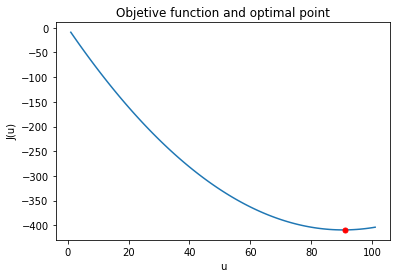

In [8]:
# Plot u , J(u)
plt.plot(control[0],criterion[0]);
plt.plot(control[0][u_star],min,marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red");
plt.xlabel("u")
plt.ylabel("J(u)")
plt.title("Objetive function and optimal point")
plt.show();

# Let´s continue with the lesson

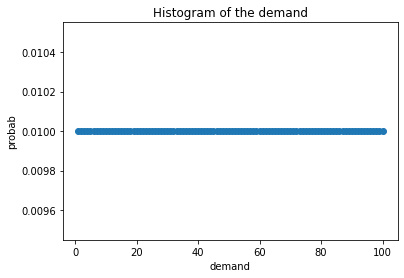

In [9]:
# Histogram of the demand
plt.scatter(demand,probab);
plt.title("Histogram of the demand");
plt.xlabel("demand")
plt.ylabel("probab")
plt.show()

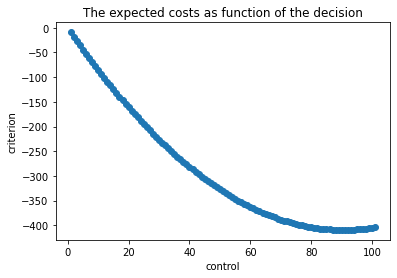

In [10]:
# Criterion / expected costs
criterion = np.matmul(probab,np.transpose(costs));
plt.scatter(control,criterion)
plt.title("The expected costs as function of the decision")
plt.xlabel("control")
plt.ylabel("criterion")
plt.show()

In [11]:
# Optimal decision 
min = np.amin(criterion);
u_star = np.where(criterion == min)[1]
optcont = np.where(criterion == np.min(criterion))[1]
print("The optimal decision is: " + str(optcont))

The optimal decision is: [90]


In [12]:
# Naive deterministic solution
meandemand = np.matmul(probab,np.transpose(demand));
print("The expected demand is "+str(np.ceil(meandemand)))

The expected demand is [[51.]]


Is it true that 0.1 lies between [0.09] and [0.1]?


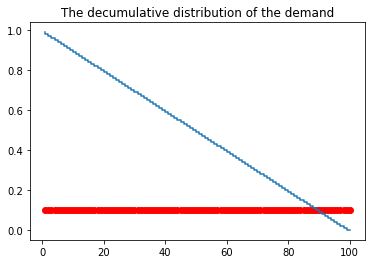

In [13]:
# Check that the optimal decision satisfies the optimality condition 
cumprobab = np.cumsum(probab);
decumprobab = 1-cumprobab;

plt.figure()
plt.step(np.transpose(demand),decumprobab)
plt.scatter(demand,cc/pp*ones_demand,color = 'red');
plt.title("The decumulative distribution of the demand")
plt.show;

print("Is it true that "+str(cc/pp)+" lies between "+str(decumprobab[optcont])+" and "+str(decumprobab[optcont-1])+"?")

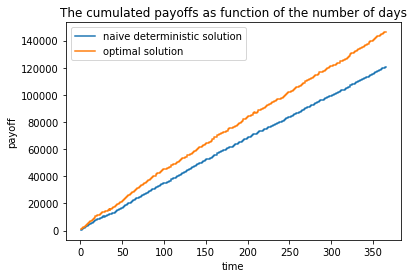

In [14]:
# simulated demands 

NS=365;
time = np.zeros((1,NS));
for i in range(NS):
    time[0][i] = i+1;

# There is no function similirar to this in python
#DD = grand(NS,'markov',np.matmul(np.transpose(ones_demand),probab),1);

DD = np.round(np.random.rand(1,NS)*(100-1))
aux1 = np.zeros((1,NS))
for i in range(NS):
  aux1[0][i] = costs[int(np.round(meandemand)[0])][int(DD[0][i])]
aux2 = np.zeros((1,NS))
for i in range(NS):
  aux2[0][i] = costs[int(optcont[0])][int(DD[0][i])]

plt.figure()
plt.step(time[0],np.cumsum(-aux1[0]),label='naive deterministic solution');
plt.step(time[0],np.cumsum(-aux2[0]),label='optimal solution')
plt.title("The cumulated payoffs as function of the number of days")
plt.xlabel("time")
plt.ylabel("payoff")
plt.legend()
plt.show()

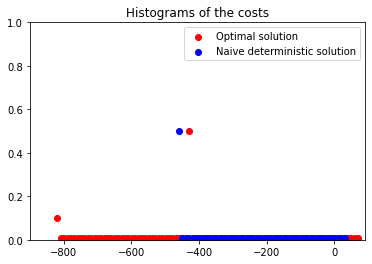

In [22]:
uu1 = optcont[0]
ss1 = 5

aux3 = np.zeros((1,uu1-1))
for i in range(uu1-1):
  aux3[0][i] = wflat+(i*1)

aux4 = np.zeros((1,uu1+1))
for i in range(uu1-1):
  aux4[0][i] = costs[uu1][int(aux3[0][i])]

aux4[0][-1] = costs[uu1][uu1]

aux5 = probab[0][0:uu1+1]
aux5[-1] = decumprobab[uu1-1]

point1 = [np.min(costs), 0]
point2 = [np.max(costs), 0]
x_values1 = [point1[0], point2[0]]
y_values2 = [point1[1], point2[1]]

uu2 = np.ceil(meandemand).astype(int)[0][0] - 1 
ss2 = 3

aux6 = np.zeros((1,uu2-1))
for i in range(uu2-1):
  aux6[0][i] = wflat+(i*1)

aux7 = np.zeros((1,uu2+1))
for i in range(uu2-1):
  aux7[0][i] = costs[uu2][int(aux6[0][i])]

aux7[0][-1] = costs[uu2][uu2]

aux8 = probab[0][0:uu2+1]
aux8[-1] = decumprobab[uu2-1]

plt.figure()
plt.scatter(aux4[0],aux5,color = 'red',label = 'Optimal solution')
plt.scatter(aux7[0],aux8,color = 'blue',label= 'Naive deterministic solution')
plt.axis([np.min(costs), np.max(costs),0, 1])
plt.legend()
plt.title('Histograms of the costs')
plt.show()


#1.2 The demand distribution is a mixture of two truncated Poisson distributions
Second, we suppose that the demand distribution $ℙ_{W}$ is a mixture of two truncated Poisson distributions as follows:

$$ℙ_{W}(w)=ℙ(W=w)=\frac{1}{2}k^{♭}\frac{(\lambda^{♭})^{w}}{w!}+\frac{1}{2}k^{♯}\frac{(\lambda^{♯})^{w}}{w!}$$

#Question 2

- [6] When the demand W follows a mixture of two truncated Poisson distributions.

# Solutions:

#Exercise [6]

# Poisson distribution

In [ ]:
import math

# Poisson
lambdaflat = wsharp/4
lambdasharp = (3*wsharp)/4

probabflat = np.zeros((1,wsharp))
for i in range(wsharp):
  probabflat[0][i] = (lambdaflat**demand[0][i])/math.factorial(demand[0][i])
probabflat = probabflat/np.sum(probabflat)

probabsharp = np.zeros((1,wsharp))
for i in range(wsharp):
  probabsharp[0][i] = (lambdasharp**demand[0][i])/math.factorial(demand[0][i])
probabflat = probabsharp/np.sum(probabsharp)

probab=0.5*probabflat+0.5*probabsharp

#1.3 The demand distribution is regular

#Question 3 

- [6] When the demand W follows a triangular distribution over $\{1, 2,…,w^{♯}\}$.





#Solutions:

#Exercise [6]

# Triangular distribution

In [ ]:
# Triangular distribution
lambda1 = np.floor(wflat+0.3*(wsharp-wflat));

left = np.cumsum(ones_demand[0][wflat:int(lambda1)])/np.sum(ones_demand[0][wflat:int(lambda1)])
right = 1 - np.cumsum(ones_demand[0][int(lambda1)+1:wsharp])/np.sum(ones_demand[0][int(lambda1)+1:wsharp])

probab = np.concatenate((left,right), axis=None)
probab = probab/np.sum(probab);

30.0
1
[0.03448276 0.06896552 0.10344828 0.13793103 0.17241379 0.20689655
 0.24137931 0.27586207 0.31034483 0.34482759 0.37931034 0.4137931
 0.44827586 0.48275862 0.51724138 0.55172414 0.5862069  0.62068966
 0.65517241 0.68965517 0.72413793 0.75862069 0.79310345 0.82758621
 0.86206897 0.89655172 0.93103448 0.96551724 1.         0.98550725
 0.97101449 0.95652174 0.94202899 0.92753623 0.91304348 0.89855072
 0.88405797 0.86956522 0.85507246 0.84057971 0.82608696 0.8115942
 0.79710145 0.7826087  0.76811594 0.75362319 0.73913043 0.72463768
 0.71014493 0.69565217 0.68115942 0.66666667 0.65217391 0.63768116
 0.62318841 0.60869565 0.5942029  0.57971014 0.56521739 0.55072464
 0.53623188 0.52173913 0.50724638 0.49275362 0.47826087 0.46376812
 0.44927536 0.43478261 0.42028986 0.4057971  0.39130435 0.37681159
 0.36231884 0.34782609 0.33333333 0.31884058 0.30434783 0.28985507
 0.27536232 0.26086957 0.24637681 0.23188406 0.2173913  0.20289855
 0.1884058  0.17391304 0.15942029 0.14492754 0.13043478 0

#2 The newsvendor problem (continuous formulation)

Here, we consider that the decision can take continuous values: $u ∈ [0, u^{♯} ]}.

We also adopt new notations. We suppose that the demand $W$ can take a ﬁnite number $S$ of possible values $D_{s}$, where $s$ denotes a scenario in the ﬁnite set $𝕊$ $(S=card(𝕊))$. We denote $π_{s}$ the probability of scenario $s ∈ 𝕊$, with

$$\sum_{s∈𝕊} π_{s} = 1   \text{ and }    π_{s} > 0, ∀s ∈ 𝕊.$$

Notice that we do not consider scenarios with zero probability.

We consider the stochastic optimization problem:

 $$ \min_{u∈ [0,u^{♯}]} J(u) = 𝔼_{ℙ}[j(u, W )] \text{ (5) }$$
We now show how to rewrite this problem as a linear program. First, we write:

$$j(u,w) = cu - p \min\{u,w\}$$
$$= \max\{cu-pu,cu-pw\}$$
$$=\min_{v\in \mathbb{R}}\{v| v\geq cu-pu,v\geq cu-pw\}$$


Second, we deduce:

$$J(u)=𝔼_{ℙ}[j(u, W )]$$
$$= \sum_{s∈𝕊} π_{s}j(u,D_{s})$$
$$= \sum_{s∈𝕊} π_{s} \min_{v\in \mathbb{R}}\{v| v\geq cu-pu,v\geq cu-pw\}$$
$$= \min_{(v_{s})_{s\in \mathbb{S}}\in \mathbb{R}} \sum_{s∈𝕊} π_{s}v_{s} $$

Under the constrains: $v_{s}\geq cu-pu,v_{s}\geq cu-pD_{s}$ for all $s\in \mathbb{S}$

Third, we conclude:

$$\min_{u∈ [0,u^{♯}]} J(u) = \min_{u∈ [0,u^{♯}],(v_{s})_{s\in \mathbb{S}}\in \mathbb{R}^{S}} \sum_{s∈𝕊} π_{s}v_{s} $$

This is a linear program.

#Question 4 

Suppose that W follows a uniform distribution over ${1, 2,…,w^{♯}}$.

- [2] Write the linear program (8) in python.
- [1] Solve the linear problem and obtain the solution to the stochastic optimization problem (5).
- [1] Compare with the optimal solution of Question 1.
- [2] Increase the number $w^{♯}$ of values taken by the demand $W$. When can you no longer solve numerically? Compare with the result of Question 1.

#Solutions:

#3 The newsvendor problem with risk (continuous formulation)
Let $λ ∈(0, 1)$ , that plays the role of a risk level. The Value at Risk of the cost $X$ at level $λ ∈(0, 1)$ is:

$$ VaR_{λ}(X ) = \inf\{x ∈  ℝ | ℙ (X > x ) < λ\}$$

The tail Value at Risk of the cost $X$ at level $λ ∈(0, 1)$ is:

                    
$$ TVaR_{λ} (X) = \frac{1}{1 − λ}\int_{λ}^{1} VaR_{λ'}(X) dλ'$$
                     
We have the limit cases:

$$ TVaR_{0} = \mathbb{E}[X] $$
$$ TVaR_{1} = \lim_{\lambda \rightarrow 1} TVaR_{\lambda} [X] = \sup_{w\in \Omega} X(w)  $$

The Rockafellar-Uryasev formula establishes that:

                 
$$T VaR_{λ}[X] = \inf_{s∈ℝ}  \{ \frac{𝔼[(X-s)^{+}]}{1 − λ}+ s \}  , λ ∈ (0, 1)$$
                    
We consider the risk averse stochastic optimization problem:

 $$\min_{u∈[0,u^{♯}]}  J (u) = T VaR_{λ}[j(u,W  )] \text{ (9) }$$ 

We rewrite this problem as a linear program:

$$ \min_{u∈[0,u^{♯}]}  J (u) = \min_{u∈[0,u^{♯}],r\in \mathbb{R},(v_{s})_{s\in S}\in \mathbb{R}^{S} } r + \frac{1}{1-\lambda}\sum_{s\in S}\pi_{s}v_{s} \text{ (10) } $$

Under the constrains:

$$∀ s∈S, v_{s}\geq cu-pu , v_{s}\geq cu-pD_{s}$$

#Question 5 

Suppose that W follows a uniform distribution over $\{1, 2,…,w^{♯}\}$.

- [2] Write the linear program (10) in python.

- [1] Solve the problem and obtain the solution to the stochastic optimization problem (9).

- [1] Compare with the optimal solution of Question 4.

#Solutions:

#4 The newsvendor problem with backorder (continuous formulation)

Now, we suppose that the newsvendor:

- pays the unitary purchasing cost $c$ per copy, when he orders stock.

- sells a copy at price $p$, we have that $c > p$.

- can buy extra copies at the unitary backorder cost $b$, after he observes a demand $w$ larger than the initial order $u$; we have that $b > c$ pays the unitary holding cost $h$ for each unsold copy, when the demand $w$ is less than the initial order $u$.

Therefore, the newsvendor’s costs are:

$$j (u, w) = cu + b[w−u]_{+} + h[u− w]_{+}+ − pw  \text{ (11) }$$
            
where we recall that $x_{+} = \max\{x,0\}$.

In [ ]:
cc = 0.1
pp = 10*cc
bb = 10*cc
hh = 10*cc

#Question 6 
We suppose that the demand W follows a uniform distribution over $\{1, 2,…,w^{♯}\}$.

- [1] Write a row vector criterion made of the values of $J(u) = 𝔼_{ℙ}[j(u, W )]$   for $u ∈\{1, 2,…,u^{♯}\}$.

- [1+1] Draw the mapping $u ∈ \{1, 2,…,u^{♯}\}↦J(u)$. Thanks to the numpy minimun function (that provides the minimum and the argmin index of a vector), give the numerical value of the decision $u^{⋆}$ (optimal order) that minimizes $u↦J(u)$.

- [1] Check that, in agreement with the theory, we numerically have that
$$ℙ(W  >  u^{⋆} − 1) ≥ \frac{c +h}{b + h}≥ ℙ (W   > u^{⋆})$$
                  
- [1+1] For a given value of $u$, what is the set of values taken by the random variable $j(u, W )$ ? Give a python formula for the probability distribution of $j(u,W)$  , using probab and decumprobab.

- [1+1] Draw a histogram of the probability distribution of the random payoﬀ (the opposite of the costs) $−j(u, W )$   for $u = u^{⋆}$ (the optimal decision) and for $u = 𝔼_{ℙ}[W]$ (the naive deterministic solution consisting in ordering the mean demand $𝔼_{ℙ}[W]$). Draw the two histograms on the same picture, so that they have the same scale. Comment on the diﬀerences between the two histograms.

- [1+1+1] Simulate the trajectory of the cumulated payoﬀs of the newsvendor during one year if, every day, he orders the optimal quantity $u = u^{⋆}$. Do the same for $u = 𝔼_{ℙ}[W]$. Compare.

- [4] Multiply the unitary holding cost $h$ by a factor $5$. Comment on the changes that you observe.

- [4] As in Section 2, write the new optimization problem as a linear program. Then, write this latter under the form adapted to python. Solve the problem and compare with the optimal solution found above by the direct method.

- [4] Increase the number $w^{♯}$ of values taken by the demand $W$. When can you no longer solve numerically? Compare with the direct method.

#Solutions: